
Detection of Fraud  in Financial Transactions using Deep Autoencoder Networks



In [1]:
# importing utilities
import os
import sys
from datetime import datetime

# importing data science libraries
import pandas as pd
import random as rd
import numpy as np

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")

#Preprocessing data - standardisation 
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('./creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


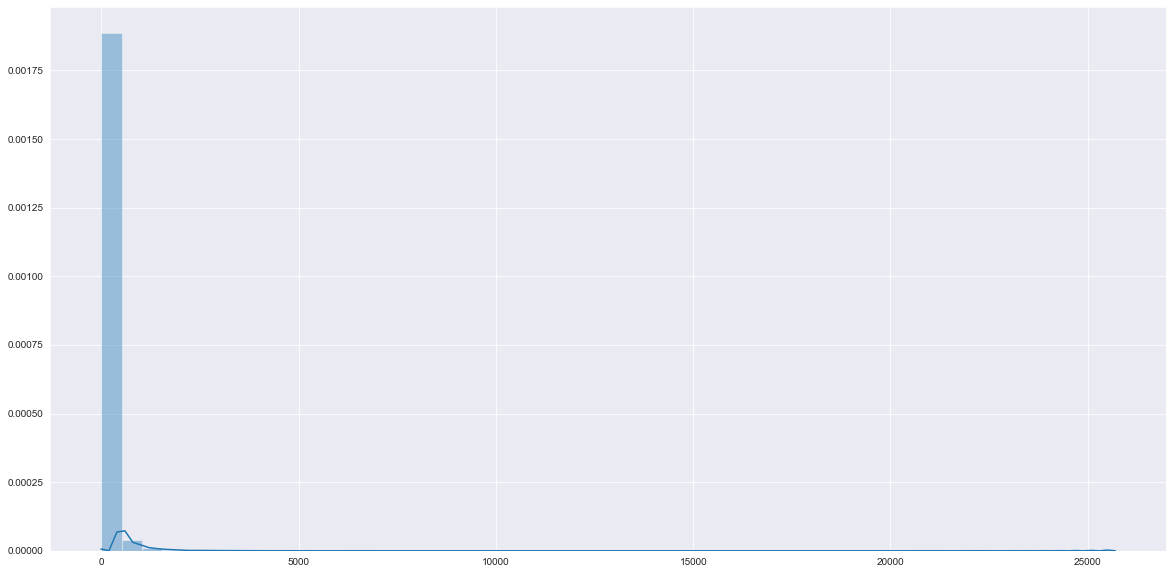

In [5]:
plt.figure(figsize=(20,10))
sns.distplot(pd.DataFrame(data.Amount))
#The distribution is positively skewed and a log tranformation and a min_max scaling will be down

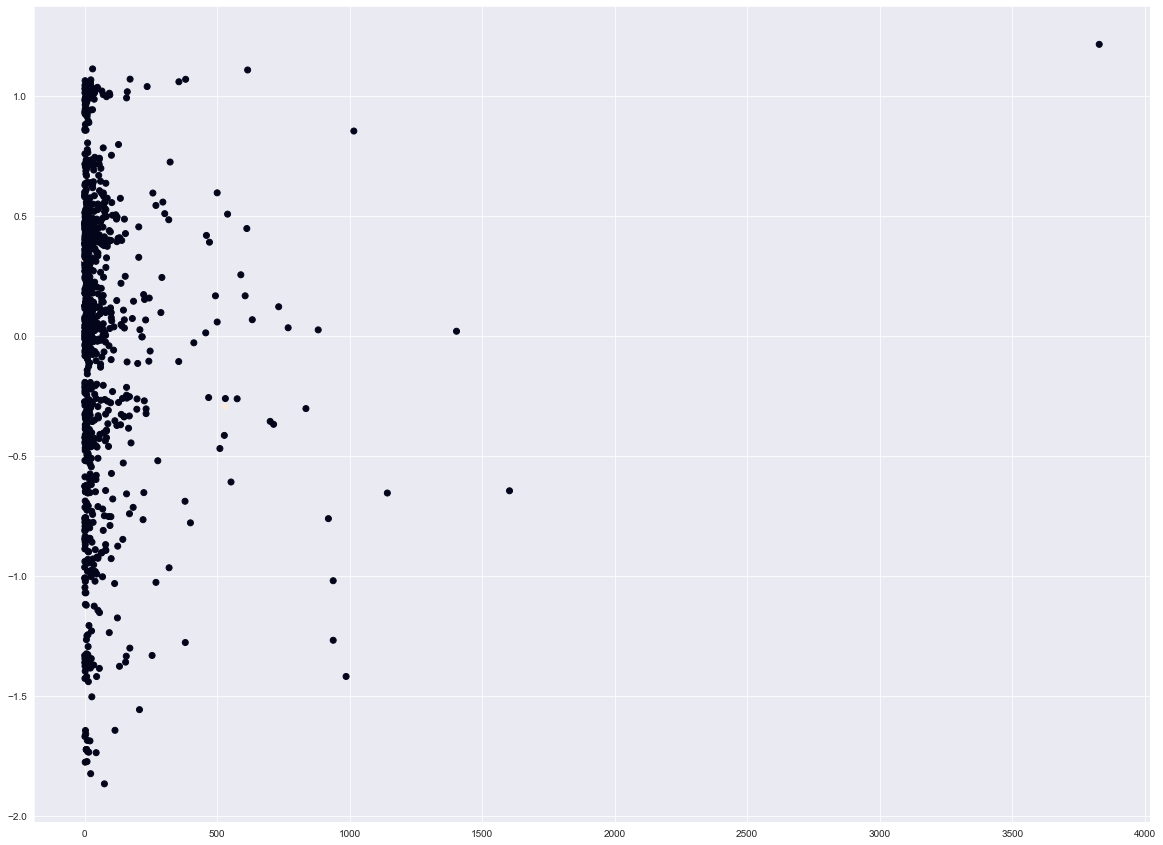

In [6]:
plt.figure(figsize=(20,15))
plt.scatter(data['Amount'][:1000],data['V24'][:1000],c=data['Class'][:1000])  

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

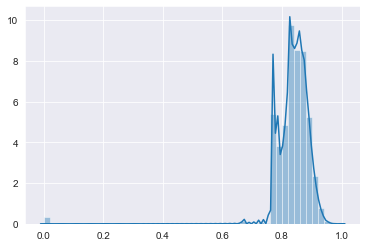

In [8]:
#Adding a small number to prevent NAN on log(0)
data['Amount']=data['Amount']+1e-15
#apply a log transformation 
data['Amount']=data['Amount'].apply(np.log)
# min- max normalisation
data['Amount']=(data['Amount']-data['Amount'].min())/(data['Amount'].max()-data['Amount'].min())
sns.distplot(data['Amount'].to_list())

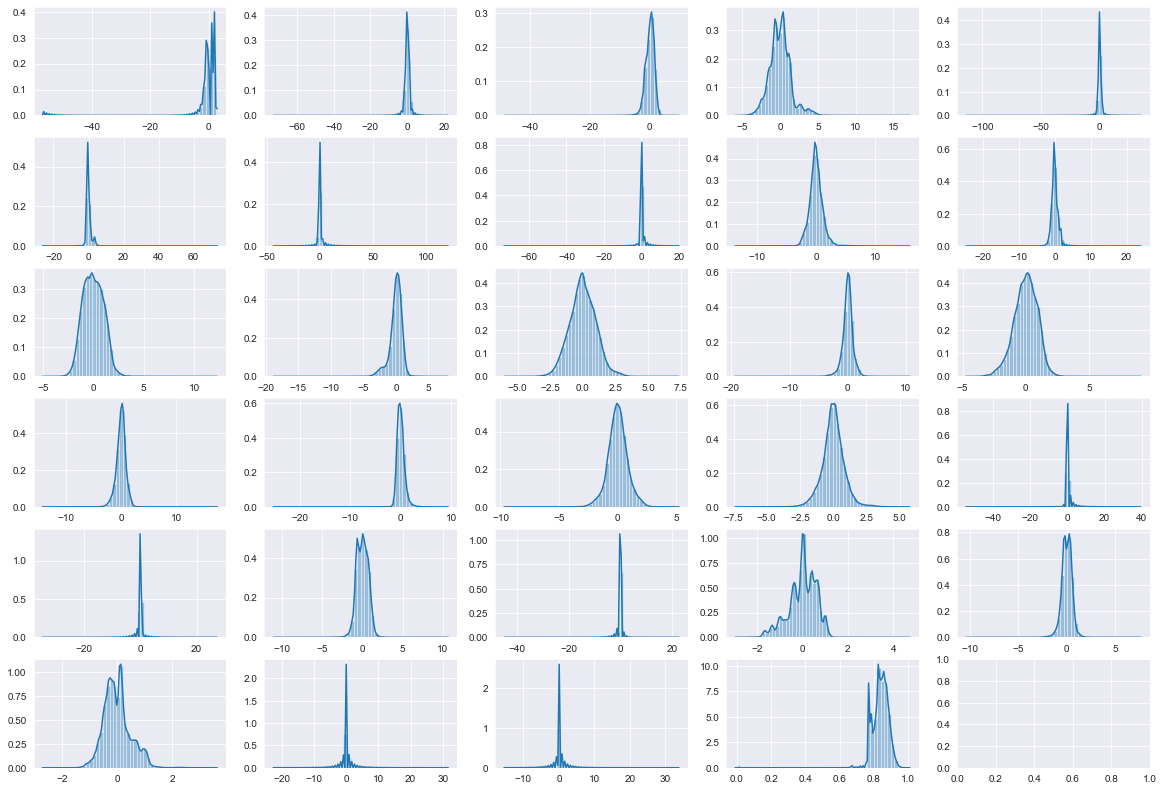

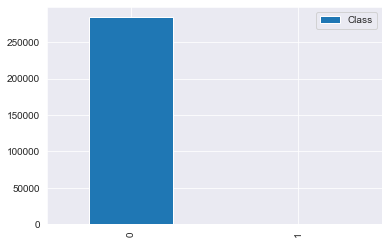

In [9]:
# Plotting the attributes
import seaborn as sns
fig,ax=plt.subplots(6,5)
fig.set_figwidth(20)
fig.set_figheight(14)
sns.distplot(data['V1'].to_list(),ax=ax[0,0])
sns.distplot(data['V2'].to_list(),ax=ax[0,1])
sns.distplot(data['V3'].to_list(),ax=ax[0,2])
sns.distplot(data['V4'].to_list(),ax=ax[0,3])
sns.distplot(data['V5'].to_list(),ax=ax[0,4])
sns.distplot(data['V6'].to_list(),ax=ax[1,0])
sns.distplot(data['V7'].to_list(),ax=ax[1,1])
sns.distplot(data['V8'].to_list(),ax=ax[1,2])
sns.distplot(data['V9'].to_list(),ax=ax[1,3])
sns.distplot(data['V10'].to_list(),ax=ax[1,4])
sns.distplot(data['V11'].to_list(),ax=ax[2,0])
sns.distplot(data['V12'].to_list(),ax=ax[2,1])
sns.distplot(data['V13'].to_list(),ax=ax[2,2])
sns.distplot(data['V14'].to_list(),ax=ax[2,3])
sns.distplot(data['V15'].to_list(),ax=ax[2,4])
sns.distplot(data['V16'].to_list(),ax=ax[3,0])
sns.distplot(data['V17'].to_list(),ax=ax[3,1])
sns.distplot(data['V18'].to_list(),ax=ax[3,2])
sns.distplot(data['V19'].to_list(),ax=ax[3,3])
sns.distplot(data['V20'].to_list(),ax=ax[3,4])
sns.distplot(data['V21'].to_list(),ax=ax[4,0])
sns.distplot(data['V22'].to_list(),ax=ax[4,1])
sns.distplot(data['V23'].to_list(),ax=ax[4,2])
sns.distplot(data['V24'].to_list(),ax=ax[4,3])
sns.distplot(data['V25'].to_list(),ax=ax[4,4])
sns.distplot(data['V26'].to_list(),ax=ax[5,0])
sns.distplot(data['V27'].to_list(),ax=ax[5,1])
sns.distplot(data['V28'].to_list(),ax=ax[5,2])
sns.distplot(data['Amount'].to_list(),ax=ax[5,3])
ax[5,4]=pd.DataFrame(data['Class'].value_counts()).plot.bar()


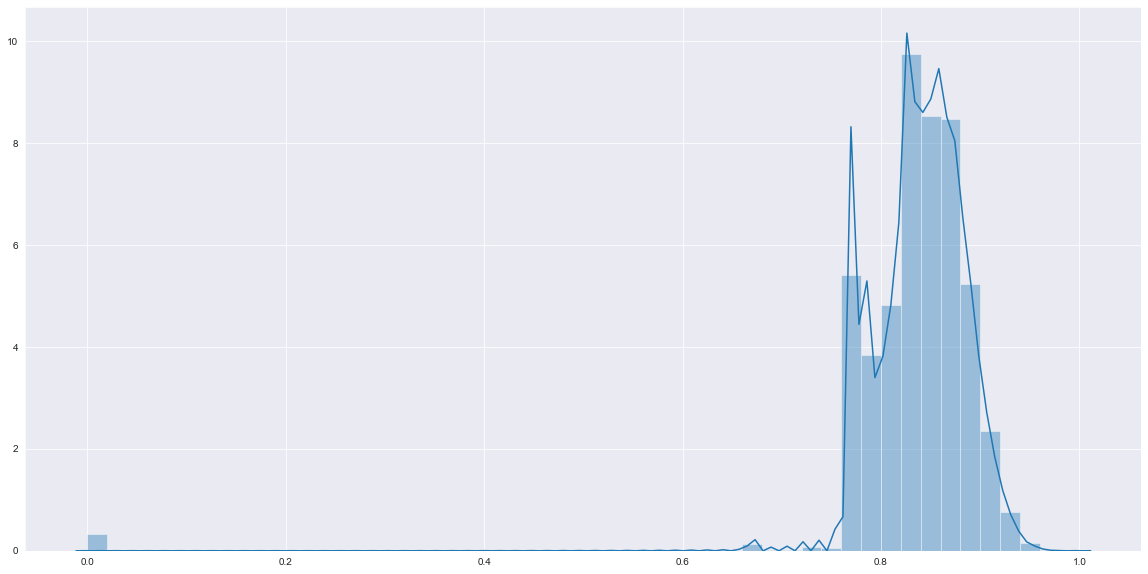

In [10]:
plt.figure(figsize=(20,10))
sns.distplot(data['Amount'].to_list())

In [11]:
data['Amount']=data['Amount']+1e-7
data['Amount']=data['Amount'].apply(np.log)

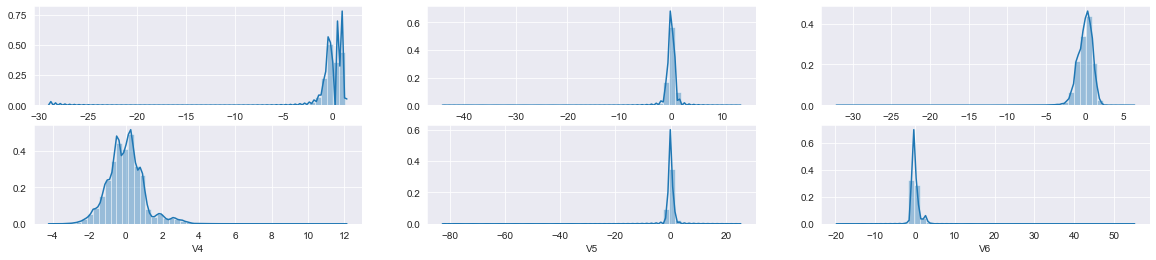

In [12]:
data['Amount'].describe()

count    2.848070e+05
mean    -2.777103e-01
std      1.273078e+00
min     -1.611810e+01
25%     -2.090518e-01
50%     -1.720128e-01
75%     -1.392082e-01
max      1.000000e-07
Name: Amount, dtype: float64

In [13]:
data['Amount']=(data['Amount']-data['Amount'].min())/(data['Amount'].max()-data['Amount'].min())

In [14]:
data['Amount'].describe()

count    284807.000000
mean          0.982770
std           0.078984
min           0.000000
25%           0.987030
50%           0.989328
75%           0.991363
max           1.000000
Name: Amount, dtype: float64

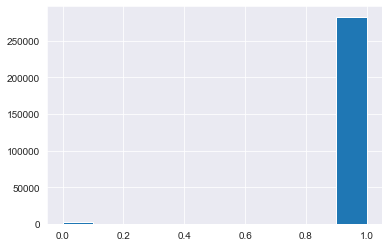

In [19]:
data['Amount'].hist()

In [15]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.992411,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.985763,0


In [19]:
lass=data.pop('Class')


In [22]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [26]:
data.shape

(284807, 30)

Autoencoder Neural Network Implementation

For the encoder, network consisting of five fully-connected 


In [40]:
# The network consist 5 fully connected layers. The encoder is specified by the following number of neurons per layer
# 30-16-8-4-2 
# The first layer consists of 31 neurons (specified by the dimensionality of the input data) 

class encoder(nn.Module):
    
    def __init__(self):
        
        super(encoder,self).__init__()
        
        #specify layer 1 in 30 , out 16
        self.encoder_L1 = nn.Linear(in_features=data.shape[1], out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights 
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 2 in 16 , out 8
        self.encoder_L2 = nn.Linear(in_features=16, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L2.weight) # init weights 
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 3 in 8 , out 4
        self.encoder_L3 = nn.Linear(in_features=8, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L3.weight) # init weights 
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        #specify layer 4 in 4 , out 2
        self.encoder_L4 = nn.Linear(in_features=4, out_features=2, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L4.weight) # init weights 
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.encoder_L4(x)) # don't apply dropout to the AE bottleneck

        return x


In [41]:
# The network consist 5 fully connected layers. The encoder is specified by the following number of neurons per layer
# 2-4-8-16-30
# The first layer consists of 2 neurons (specified by the dimensionality of the input data latent variable z) 


class decoder(nn.Module):
    
    def __init__(self):
        
        super(decoder, self).__init__()
                
         #specify layer 1 in 2 , out 4
        self.decoder_L1 = nn.Linear(in_features=4, out_features=2, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight) # init weights 
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity    
        
         
        #specify layer 2 in 4 , out 8
        self.decoder_L2 = nn.Linear(in_features=8, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L2.weight) # init weights 
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity      
        
         #specify layer 3 in 8 , out 16
        self.decoder_L3 = nn.Linear(in_features=16, out_features=8, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight) # init weights 
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity        
        
        #specify layer 4 in 16 , out 30
        self.decoder_L3 = nn.Linear(in_features=data.shape[1], out_features=16, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L3.weight) # init weights 
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity 
        
         # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0.0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.decoder_L4(x)) # don't apply dropout to the AE bottleneck

        return x

In [34]:
# init training network classes / architectures
encoder_train = encoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()

Parameter containing:
tensor([[-0.1049,  0.0177,  0.0025,  ...,  0.0853,  0.0779, -0.0265],
        [ 0.0758, -0.0892,  0.0868,  ...,  0.0167, -0.0713,  0.0547],
        [ 0.0952,  0.0871,  0.1050,  ...,  0.1022,  0.0236, -0.0192],
        ...,
        [-0.0217, -0.0950, -0.1034,  ...,  0.0814,  0.0487,  0.0135],
        [ 0.0740, -0.0086,  0.0595,  ...,  0.0277, -0.0908,  0.0868],
        [-0.0816, -0.0086, -0.0357,  ..., -0.0792,  0.0577,  0.0939]],
       requires_grad=True)

In [ ]:
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] encoder architecture:\n\n{}\n'.format(now, encoder_train))

In [ ]:
# init training network classes / architectures
decoder_train = decoder()

# push to cuda if cudnn is available
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()
    
# print the initialized architectures
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] decoder architecture:\n\n{}\n'.format(now, decoder_train))

In [ ]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')


In [ ]:
# define learning rate and optimization strategy
learning_rate = 1e-3
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

Training the Autoencoder Neural Network (AENN) Model

In this section, we will train our deep autoencoder neural network using the encoded 
transactional data. More specifically, we will have a detailed look into the distinct 
training steps as well as how to monitor the training progress.

Preparing the Network Training

We have pre-processed the dataset, implemented the AENN and defined the reconstruction error. Let's now start to train a
corresponding model for 5 epochs and a mini-batch size of  128 entries per batch. This implies that the whole dataset
will be fed to the AENN 5 times in chunks of 128 journal entries 
yielding to 2,225 mini-batches (284807 entries / 128 journal entries per mini-batch) per epoch.

In [42]:
# specify training parameters
num_epochs = 5
mini_batch_size = 128

284807

In [ ]:
# convert pre-processed data to pytorch tensor
torch_dataset = torch.from_numpy(ori_subset_transformed.values).float()

# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_dataset, batch_size=mini_batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results

# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=mini_batch_size, shuffle=True)


reconstruction_loss.backward() computes the gradients based on the magnitude of the reconstruction loss,
encoder_optimizer.step() and decoder_optimizer.step() updates the network parameters based on the gradient

In addition, after each training epoch we want to save a checkpoint for both the actual encoder and decoder model. The saved model checkpoints contain a snapshot of the trained model parameter values upon completion of a training epoch. In general, it is good practice, to save checkpoints at regular intervals during training. In case your system crashes during training you are able continue from the last checkpoint rather than start over from scratch.
torch.save(): saves a checkpoint of the actual encoder and decoder model parameter values to disc.

In [ ]:
# init collection of mini-batch losses
losses = []

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_dataset)

# train autoencoder model
for epoch in range(num_epochs):

    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()

    # =================== evaluate model performance =============================
    
    # set networks in evaluation mode (don't apply dropout)
    encoder_train.cpu().eval()
    decoder_train.cpu().eval()

    # reconstruct encoded transactional data
    reconstruction = decoder_train(encoder_train(data))
    
    # determine reconstruction loss - all transactions
    reconstruction_loss_all = loss_function(reconstruction, data)
            
    # collect reconstruction loss
    losses.extend([reconstruction_loss_all.item()])
    
    # print reconstuction loss results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f}'.format(now, (epoch+1), num_epochs, reconstruction_loss_all.item()))

    # =================== save model snapshot to disk ============================
    
    # save trained encoder model file to disk
    encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
    torch.save(encoder_train.state_dict(), os.path.join("./models", encoder_model_name))

    # save trained decoder model file to disk
    decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
    torch.save(decoder_train.state_dict(), os.path.join("./models", decoder_model_name))


Let's now evaluate if the loss function is indeed going down with progressing training of the model. Therefore, let's visualize the magnitudes of the losses obtained per training epoch:

In [ ]:
# plot the training progress
plt.plot(range(0, len(losses)), losses)
plt.xlabel('[training epoch]')
plt.xlim([0, len(losses)])
plt.ylabel('[reconstruction-error]')
#plt.ylim([0.0, 1.0])
plt.title('AENN training performance')

In [ ]:
# restore pretrained model checkpoint
encoder_model_name = "ep_10_encoder_model.pth"
decoder_model_name = "ep_10_decoder_model.pth"

# init training network classes / architectures
encoder_eval = encoder()
decoder_eval = decoder()

# load trained models
encoder_eval.load_state_dict(torch.load(os.path.join("models", encoder_model_name)))

In [ ]:
# determine reconstruction loss - all transactions
reconstruction_loss_all = loss_function(reconstruction, data)

# print reconstruction loss - all transactions
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] collected reconstruction loss of: {:06}/{:06} transactions'.format(now, reconstruction.size()[0], reconstruction.size()[0]))
print('[LOG {}] reconstruction loss: {:.10f}'.format(now, reconstruction_loss_all.item()))


6.2 Assessment of the Individual Transactions

Ok, now that we are convinced that the pre-trained model is of decent quality let's assess the individual journal entries of the dataset. To achieve this, we collect the reconstruction errors of each individual journal entry by executing the cell below:

In [ ]:
# init binary cross entropy errors
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 100000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))
        

In [ ]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# assign unique id to transactions
plot_data = np.column_stack((np.arange(len(reconstruction_loss_transaction)), reconstruction_loss_transaction))

# obtain regular transactions as well as global and local anomalies
regular_data = plot_data[label == 'regular']
global_outliers = plot_data[label == 'global']
local_outliers = plot_data[label == 'local']

# plot reconstruction error scatter plot
ax.scatter(regular_data[:, 0], regular_data[:, 1], c='C0', alpha=0.4, marker="o", label='regular') # plot regular transactions
ax.scatter(global_outliers[:, 0], global_outliers[:, 1], c='C1', marker="^", label='global') # plot global outliers
ax.scatter(local_outliers[:, 0], local_outliers[:, 1], c='C2', marker="^", label='local') # plot local outliers

# add plot legend of transaction classes
ax.legend(loc='best')


The visualization reveals that the pre-trained model is able to reconstruct the majority of regular journal entries, while failing to do so, for the anomalous ones. As a result, the model reconstruction error can be used to distinguish both "global" anomalies (orange) and "local" anomalies (green) from the regular journal entries (blue).
To further investigate our observation and confirm the initial assumption, let's have a closer look into the journal entries exhibiting a "high" binary cross-entropy reconstruction error >= 0.1. We assume that these journal entries correspond to the "global" anomalies of the original dataset:

In [ ]:
# append labels to original dataset
ori_dataset['label'] = label

# inspect transactions exhibiting a reconstruction error >= 0.1
ori_dataset[reconstruction_loss_transaction >= 0.1]

In [ ]:
# inspect transactions exhibiting a reconstruction error < 0.1 and >= 0.05
ori_dataset[(reconstruction_loss_transaction >= 0.05) & (reconstruction_loss_transaction < 0.1)]

In [ ]:
# Define custom loss
def custom_loss(cost_FP, cost_TP, cost_TN, cost_FN):
    def loss(y_true,y_pred):
          cost = y_true * np.log(y_pred)*cost_FN 
                + y_true * np.log(1-y_pred)*cost_TP + (1-y_true) * K.log(1-y_pred) * cost_FP 
                +  (1-y_true) * K.log(y_pred) * cost_TN
        return np.mean(cost,axis=-1)
    return loss
loss=custom_loss(cost_FP, cost_TP, cost_TN, cost_FN)


In [3]:
import numpy as np 
np.mean(np.array([2,3,2,3]))

2.5